<a href="https://colab.research.google.com/github/SazidBhuiyan/Mental-Health-Disorder-AI-prediction/blob/first_dataset_model/mhd_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
mental_health_df1 = pd.read_csv('dataset1.csv')

In [8]:
display(mental_health_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

None

In [11]:
mental_health_df1 = mental_health_df1.drop('comments', axis=1)
display(mental_health_df1.info())

KeyError: "['comments'] not found in axis"

In [14]:
# Calculate the mode to fill up null values in column states
mode_state = mental_health_df1['state'].mode()[0]
# Fill null values with the mode
mental_health_df1['state'].fillna(mode_state, inplace=True)

# Display the number of null values in the 'state' column after filling
display(mental_health_df1['state'].isnull().sum())


np.int64(0)

## Finish task

We have successfully filled the missing values in the 'work_interfere' column of the `mental_health_df1` DataFrame using a machine learning model.

The process involved:
- Identifying relevant features.
- Encoding categorical variables.
- Splitting the data.
- Training a classification model.
- Predicting missing values.
- Filling the nulls in the original DataFrame.
- Visualizing the distributions to assess the imputation.

The `work_interfere` column should now be complete.

# Task
Fill the missing values in the 'work_interfere' column of the `mental_health_df1` DataFrame using a machine learning model trained on the available data in the same column.

## Identify relevant columns

### Subtask:
Identify relevant columns that could be useful for predicting the 'work_interfere' values.


**Reasoning**:
I need to examine the columns in the dataframe and identify those that are potentially related to 'work_interfere'. I will list these columns as potential features for the predictive model.



In [15]:
# Examine the columns in the DataFrame
print(mental_health_df1.columns)

# Based on the column names and their potential relationship with 'work_interfere',
# list the columns that could be relevant features for a predictive model.
# Columns related to mental health, treatment, benefits, support at work, etc.
relevant_columns = [
    'Age',
    'Gender',
    'Country',
    'state',
    'self_employed',
    'family_history',
    'treatment',
    'no_employees',
    'remote_work',
    'tech_company',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical',
    'obs_consequence'
]

print("\nRelevant columns for predicting 'work_interfere':")
for col in relevant_columns:
    print(col)

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

Relevant columns for predicting 'work_interfere':
Age
Gender
Country
state
self_employed
family_history
treatment
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence


## Handle categorical variables

### Subtask:
Convert categorical columns to a numerical format suitable for modeling, such as one-hot encoding.


**Reasoning**:
Identify and one-hot encode the categorical columns within the relevant_columns list.



In [16]:
# Identify categorical columns from the relevant_columns list
categorical_cols = [col for col in relevant_columns if mental_health_df1[col].dtype == 'object']

# Apply one-hot encoding to the identified categorical columns
mental_health_df1_encoded = pd.get_dummies(mental_health_df1, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame and its info to verify
display(mental_health_df1_encoded.head())
display(mental_health_df1_encoded.info())

,Timestamp,Age,work_interfere,Gender_Agender,Gender_All,Gender_Androgyne,Gender_Cis Female,Gender_Cis Male,Gender_Cis Man,Gender_Enby,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,2014-08-27 11:29:31,37,Often,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
1,2014-08-27 11:29:37,44,Rarely,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,2014-08-27 11:29:44,32,Rarely,False,False,False,False,False,False,False,...,True,False,True,False,True,False,True,True,False,False
3,2014-08-27 11:29:46,31,Often,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,2014-08-27 11:30:22,31,Never,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Columns: 181 entries, Timestamp to obs_consequence_Yes
dtypes: bool(178), int64(1), object(2)
memory usage: 248.5+ KB


None

## Split data

### Subtask:
Separate the rows with missing 'work_interfere' values from those with existing values. The latter will be used to train the imputation model.


**Reasoning**:
Create two dataframes, one for training the imputation model containing rows with non-null 'work_interfere' values, and another for prediction containing rows with null 'work_interfere' values, then display the number of rows in each to confirm the split.



In [17]:
df_train = mental_health_df1_encoded[mental_health_df1_encoded['work_interfere'].notna()].copy()
df_predict = mental_health_df1_encoded[mental_health_df1_encoded['work_interfere'].isna()].copy()

print(f"Number of rows in df_train: {len(df_train)}")
print(f"Number of rows in df_predict: {len(df_predict)}")

Number of rows in df_train: 995
Number of rows in df_predict: 264


## Choose and train a model

### Subtask:
Select a suitable classification model (since 'work_interfere' is categorical) and train it on the data where 'work_interfere' is not null.


**Reasoning**:
Import the necessary classification model from scikit-learn and train it on the training data.



In [18]:
from sklearn.ensemble import RandomForestClassifier

X_train = df_train.drop(['work_interfere', 'Timestamp'], axis=1)
y_train = df_train['work_interfere']

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict missing values

### Subtask:
Use the trained model to predict the 'work_interfere' values for the rows where they are missing.


**Reasoning**:
Prepare the prediction data and use the trained model to predict the missing 'work_interfere' values.



In [19]:
X_predict = df_predict.drop(['work_interfere', 'Timestamp'], axis=1)

predicted_work_interfere = model.predict(X_predict)

df_predict['predicted_work_interfere'] = predicted_work_interfere

display(df_predict.head())

,Timestamp,Age,work_interfere,Gender_Agender,Gender_All,Gender_Androgyne,Gender_Cis Female,Gender_Cis Male,Gender_Cis Man,Gender_Enby,...,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,predicted_work_interfere
19,2014-08-27 11:35:08,36,NaN,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,Sometimes
26,2014-08-27 11:37:23,33,NaN,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,Never
37,2014-08-27 11:41:50,38,NaN,False,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,Never
38,2014-08-27 11:42:08,50,NaN,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,Never
41,2014-08-27 11:42:31,35,NaN,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,Sometimes


## Fill null values

### Subtask:
Replace the null values in the original DataFrame with the predicted values.


**Reasoning**:
Replace the null values in the original DataFrame with the predicted values from the df_predict DataFrame.



In [20]:
null_indices = df_predict.index
mental_health_df1.loc[null_indices, 'work_interfere'] = df_predict['predicted_work_interfere']
display(mental_health_df1['work_interfere'].isnull().sum())

np.int64(0)

## Evaluate results

### Subtask:
Evaluate the quality of the imputation.


**Reasoning**:
Generate count plots for the original and predicted 'work_interfere' distributions to visually compare them.



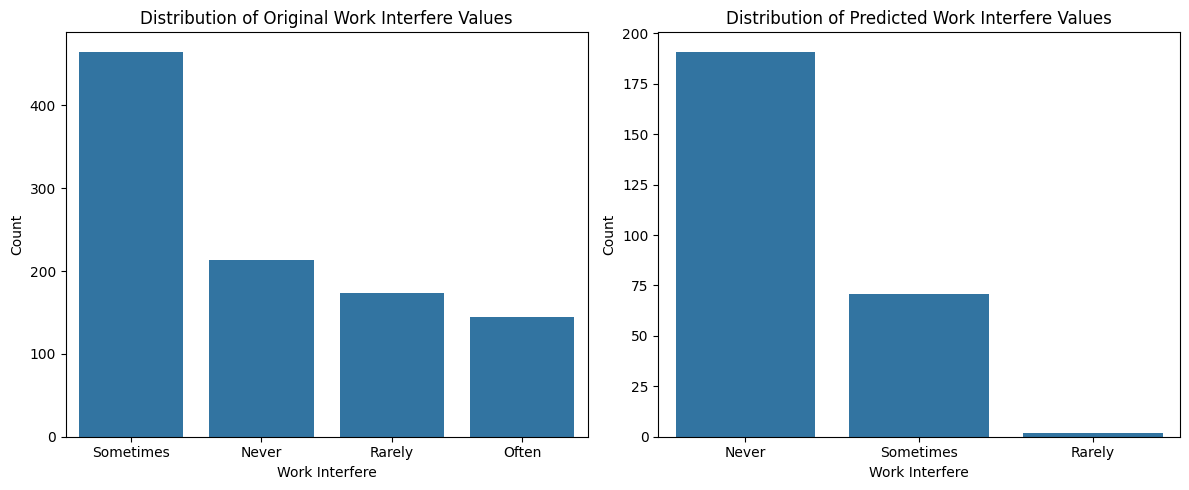

In [22]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x='work_interfere', order=df_train['work_interfere'].value_counts().index)
plt.title('Distribution of Original Work Interfere Values')
plt.xlabel('Work Interfere')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_predict, x='predicted_work_interfere', order=df_predict['predicted_work_interfere'].value_counts().index)
plt.title('Distribution of Predicted Work Interfere Values')
plt.xlabel('Work Interfere')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [23]:
display(mental_health_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      1259 non-null   object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

None

In [24]:
# Calculate the mode to fill null values in the 'self_employed' column
mode_self_employed = mental_health_df1['self_employed'].mode()[0]

# Fill null values with the mode
mental_health_df1['self_employed'].fillna(mode_self_employed, inplace=True)

# Display the number of null values in the 'self_employed' column after filling
display(mental_health_df1['self_employed'].isnull().sum())

/tmp/ipython-input-1632351316.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mental_health_df1['self_employed'].fillna(mode_self_employed, inplace=True)


np.int64(0)

In [25]:
display(mental_health_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      1259 non-null   object
 5   self_employed              1259 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

None